Step 1: Import Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Step 2a: Get Data


In [18]:
x, y = load_digits(return_X_y=True)
print(x,'\n\n',y,'\n')
# given data looks like arrays
print(x.shape,'\n\n',y.shape )

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

 [0 1 2 ... 8 9 8] 

(1797, 64) 

 (1797,)


Step 2b: Split Data

In [21]:
x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.2, random_state=0)

Step 2c: Scale Data


In [25]:
# Standardization might improve the performance of your algorithm.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Step 3: Create a Model and Train It


In [30]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

Step 4: Evaluate the Model


In [32]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)

In [35]:
# accuracy wrt train and test results
model.score(x_train, y_train), model.score(x_test, y_test)

(0.964509394572025, 0.8805555555555555)

In [36]:
# confusion matrix with confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  3, 28,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  0, 23,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  3,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  4,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 10, 30]], dtype=int64)

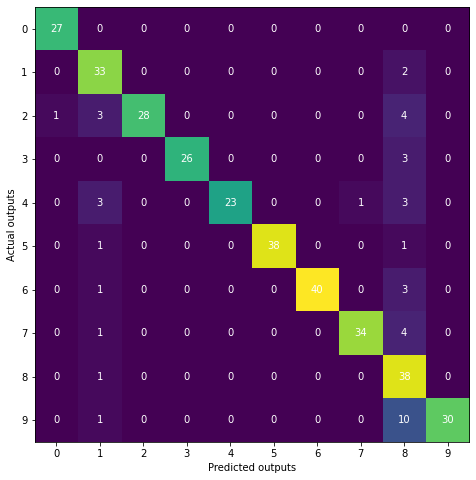

In [40]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w')
plt.show()

In [43]:
# get the report on classification as a string or
# dictionary with classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.75      0.94      0.84        35
           2       1.00      0.78      0.88        36
           3       1.00      0.90      0.95        29
           4       1.00      0.77      0.87        30
           5       1.00      0.95      0.97        40
           6       1.00      0.91      0.95        44
           7       0.97      0.87      0.92        39
           8       0.56      0.97      0.71        39
           9       1.00      0.73      0.85        41

    accuracy                           0.88       360
   macro avg       0.92      0.88      0.89       360
weighted avg       0.92      0.88      0.89       360

